In [369]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Cargamos la data 

El dataset Fashion-MNIST cotiene 60,00 imagenes para el set de datos de entrenamiento y un set de datos de prueba de 10,000.

In [370]:
fashion_mnist = keras.datasets.fashion_mnist

In [371]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Imagenes
Las imagenes son Numpy Arrays de 28x28, los pixeles estan entre los valores de 0 a 255

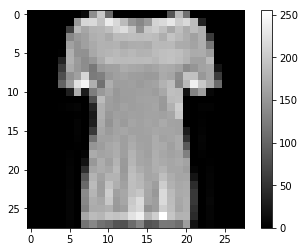

In [372]:
plt.imshow(train_images[10], cmap = 'gray')
plt.colorbar()

## Labels

In [373]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

| Label | Class       |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

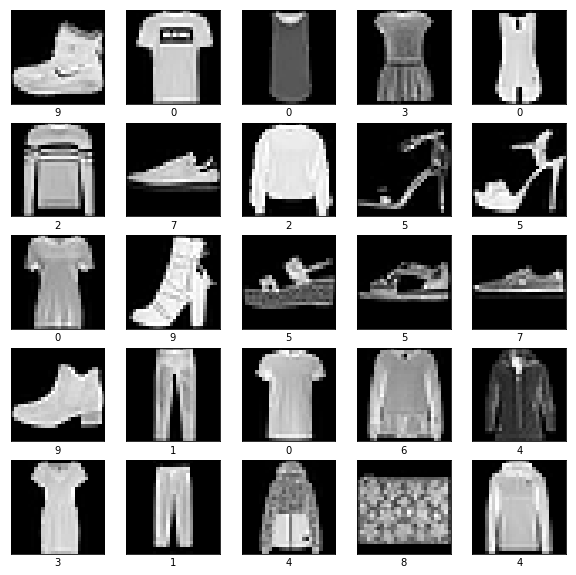

In [374]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

# Tarea

Para esta tarea se deben utilizar únicamente 3 clases, se puede escoger cualquiera de las 10 disponibles en el data set, por lo que hay que filtrar las clases elegidas en los arreglos:
- train_images
- train_labels
- test_images
- test_labels

El objetivo de la tarea es comparar la diferencia al aplicar feature scale/normalization y las features sin ninguna transformación y comparar el efecto de el scaling/normalización sobre el entrenamiento con regresión logística.
- Se debe crear un diccionario con el valor numérico de las labels y el texto correspondiente para poder relacionar el valor numérico con el valor descriptivo/textual.
- Aplicar regresión logística con entropía cruzada como función de costo, crear una función que recibe de entrada un tensor x y predice la clase(utilizar el diccionario para mostrar el texto perteneciente al label).
- Adicional a el costo(por entropía cruzada) en el grafo se debe agregar un nodo que calcule el acurracy(comparando el valor real vs el estimado por el modelo).
- El accuracy y el costo deben ser agregados a tensorboard(agregar screenshots al notebook)
- Se debe agregar al notebook un screenshot del grafo/grafos de tensorboard, simplificando(usando names y name_scope como visto en clase).
- Todo lo anterior se debe hacer tanto para datos crudos, como para datos transformados con (normalización y escalado)
- Basado en los ejemplos de visualización de imagenes en el notebook ,crear una función que reciba de entrada el tensor que representa a una imagen, grafique esta imagen poniendo como título el nombre de la prenda con mayor probabilidad.
- Utilizar la función anterior para mostrar una muestra aleatoria de 5 imágenes(y la predicción probabilistica de la prenda)
- Comparar con tensorboard las curvas de aprendizaje del entrenamiento con datos crudos vs datos transformados, y los 2 grafos y concluir/opinar al respecto usando markdown(agregando screenshots)
- Utilizar mini batch gradient descent con batch size de 32

## Data Exploration 
     
  Reshaping train and test images will be necesary for classification model

In [375]:
print(type(train_images), type(train_labels), type(test_images),type(test_labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [376]:
print("train_images:",np.shape(train_images)," train_labels:",np.shape(train_labels)," test_images:", np.shape(test_images), 
      "test_labels:", np.shape(test_labels))

train_images: (60000, 28, 28)  train_labels: (60000,)  test_images: (10000, 28, 28) test_labels: (10000,)


In [377]:
train_images[0].shape

(28, 28)

## Filtering Data

In [378]:
train_labels_model = train_labels[(train_labels == 0) | (train_labels == 6) | (train_labels == 9)]
train_images_model = train_images[(train_labels == 0) | (train_labels == 6) | (train_labels == 9)]
test_labels_model  = test_labels[(test_labels == 0) | (test_labels == 6) | (test_labels == 9)]
test_images_model  = test_images[(test_labels== 0) | (test_labels == 6) | (test_labels == 9)]


print("Training Arrays have a dimension of:", len(train_images_model), 
      "Test Arrays have a dimension of:", len(test_labels_model))

Training Arrays have a dimension of: 18000 Test Arrays have a dimension of: 3000


## One Hot Encoding 

In [379]:
train_labels_model_encoded = pd.DataFrame(train_labels_model)
train_labels_model_hot= pd.get_dummies(train_labels_model_encoded[0])
train_labels_model = train_labels_model_hot
np.shape(train_labels_model)

(18000, 3)

In [380]:
test_labels_model_encoded = pd.DataFrame(test_labels_model)
test_labels_model_hot= pd.get_dummies(test_labels_model_encoded[0])
test_labels_model = test_labels_model_hot
np.shape(test_labels_model)

(3000, 3)

In [381]:
train_labels_model.head()

,0,6,9
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [382]:
test_labels_model.head()

,0,6,9
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1


In [383]:
train_imagesv = train_images_model/255
train_imagesv = train_imagesv.reshape(18000,784)
train_imagesv.shape
#np.shape(train_imagesv[1])[0]
#train_imagesv[0]
#print(train_imagesv)

(18000, 784)

In [384]:
test_imagesv = test_images_model/255
test_imagesv = test_imagesv.reshape(3000,784)
test_imagesv.shape

(3000, 784)

## Creating dictionary with cloth names

In [385]:
label_dictionary = {
    0: "T-shirt/Top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot"
    
}

label_dictionary

{0: 'T-shirt/Top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'}

## Tensorflow Graph for Multinomial model

<img src="./graphs/log_reg.png" />

In [405]:
tf.reset_default_graph()
##Hyperparameters
batch = 512
m = np.shape(train_imagesv[1])[0]
n = np.shape(train_labels_model)[1]
training_epochs = 1000
learning_rate = .01

x_train = tf.placeholder(tf.float64, shape =[None,m], name="x_train")
y_train = tf.placeholder(tf.float64, shape=[None,n], name="y_train")

#W = tf.Variable(np.random.randn(m,n), name = "W") 
#b = tf.Variable(np.random.randn(n), name = "b")

W = tf.Variable(np.zeros([m,n]), name = "W") 
b = tf.Variable(np.zeros(n), name = "b")

with tf.name_scope("Hypotesis"):
    logits = tf.matmul(x_train,W) + b
    y_pred = tf.nn.softmax(logits, name="Softmax")

with tf.name_scope("Cross_Entropy"):
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_train * tf.log(y_pred), reduction_indices=[1]))

with tf.name_scope("Optimizer"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

with tf.name_scope("Accuracy"):
    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_train,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

with tf.name_scope("Disturbance"):
    disturbance = tf.summary.scalar(name = "Costfunction", tensor = cross_entropy)
#summaries = tf.summary.merge_all()



In [406]:
with tf.Session() as sess:
    
    sess.run(init)
    writer = tf.summary.FileWriter( './error_graphs/test', sess.graph)
    
    for epoch in range(training_epochs+1):
        
        batch_num = (epoch * batch ) % (train_imagesv.shape[0] -batch)
        
        
        sess.run(optimizer, feed_dict = {x_train: train_imagesv[batch_num:(batch_num+batch)], 
                                         y_train : train_labels_model[batch_num:(batch_num+batch)]})
        
        
        
        if (epoch + 1) % 100 == 0:
            c = sess.run(disturbance, feed_dict = {x_train: train_imagesv[batch_num:(batch_num+batch)], 
                                         y_train : train_labels_model[batch_num:(batch_num+batch)]}) 
            print("Epoch: " + str(epoch) + " accuracy: " + 
              str(sess.run(accuracy, feed_dict = {x_train: train_imagesv[batch_num:(batch_num+batch)],
                                                  y_train : train_labels_model[batch_num:(batch_num+batch)]})))
            
            
            

            
            writer.add_summary(c,epoch)
    weights = W.eval()
    bias = b.eval()
    sess.close()

Epoch: 99 accuracy: 0.8828125
Epoch: 199 accuracy: 0.87109375
Epoch: 299 accuracy: 0.8964844
Epoch: 399 accuracy: 0.87890625
Epoch: 499 accuracy: 0.8886719
Epoch: 599 accuracy: 0.9140625
Epoch: 699 accuracy: 0.875
Epoch: 799 accuracy: 0.91796875
Epoch: 899 accuracy: 0.9082031
Epoch: 999 accuracy: 0.9003906


## Defining classification function 

Takes in as parameters the number of epochs, the batch size of training data, the training image data and its label. Furthermore, it stores 

In [396]:
def multinomial_model(epoch_num,lr,batch_size,train_image,train_label) :
    
    tf.reset_default_graph()
    ##Hyperparameters
    batch = batch_size
    m = np.shape(train_image[1])[0]
    n = np.shape(train_label)[1]
    training_epochs = epoch_num
    learning_rate = lr

    x_train = tf.placeholder(tf.float64, shape =[None,m], name="x_train")
    y_train = tf.placeholder(tf.float64, shape=[None,n], name="y_train")

    #W = tf.Variable(np.random.randn(m,n), name = "W") 
    #b = tf.Variable(np.random.randn(n), name = "b")

    W = tf.Variable(np.zeros([m,n]), name = "W") 
    b = tf.Variable(np.zeros(n), name = "b")

    with tf.name_scope("Hypotesis"):
        logits = tf.matmul(x_train,W) + b
        y_pred = tf.nn.softmax(logits, name="Softmax")

    with tf.name_scope("Cross_Entropy"):
        cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_train * tf.log(y_pred), reduction_indices=[1]))

    with tf.name_scope("Optimizer"):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

    with tf.name_scope("Accuracy"):
        correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_train,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    init = tf.global_variables_initializer()

    with tf.name_scope("Disturbance"):
        disturbance = tf.summary.scalar(name = "Costfunction", tensor = cross_entropy)
        
    with tf.name_scope("Accuracy"):
        ac = tf.summary.scalar(name = "Costfunction", tensor = accuracy)
        
    #summaries = tf.summary.merge_all()
    
    with tf.Session() as sess:
    
        sess.run(init)
        writer = tf.summary.FileWriter( './error_graphs/epoch_'+str(epoch_num)+'batch_size'+str(batch_size)+'lr'+str(lr), sess.graph)
        print('Graph saved at ./error_graphs/epoch_'+str(epoch_num)+'_batch_size_'+str(batch_size)+'_lr_'+str(lr))
        for epoch in range(training_epochs+1):

            batch_num = (epoch * batch ) % (train_imagesv.shape[0] -batch)


            sess.run(optimizer, feed_dict = {x_train: train_imagesv[batch_num:(batch_num+batch)], 
                                             y_train : train_labels_model[batch_num:(batch_num+batch)]})



            if (epoch + 1) % 100 == 0:
                c = sess.run(disturbance, feed_dict = {x_train: train_imagesv[batch_num:(batch_num+batch)], 
                                             y_train : train_labels_model[batch_num:(batch_num+batch)]})
                
                a = sess.run(ac, feed_dict = {x_train: train_imagesv[batch_num:(batch_num+batch)], 
                                             y_train : train_labels_model[batch_num:(batch_num+batch)]})
                
                print("Epoch: " + str(epoch) + " accuracy: " + 
                  str(sess.run(accuracy, feed_dict = {x_train: train_imagesv[batch_num:(batch_num+batch)],
                                                      y_train : train_labels_model[batch_num:(batch_num+batch)]})))





                writer.add_summary(c,epoch)
                writer.add_summary(a,epoch)
                
        #weights = W.eval()
        #bias = b.eval()
        return((W.eval(),b.eval()))
        sess.close()
        writer.close()





In [397]:
multinomial_model(epoch_num=1000,lr=10,batch_size=32,train_image=train_imagesv,train_label=train_labels_model)

Graph saved at ./error_graphs/epoch_1000_batch_size_32_lr_10
Epoch: 99 accuracy: 0.1875
Epoch: 199 accuracy: 0.40625
Epoch: 299 accuracy: 0.34375
Epoch: 399 accuracy: 0.34375
Epoch: 499 accuracy: 0.21875
Epoch: 599 accuracy: 0.28125
Epoch: 699 accuracy: 0.46875
Epoch: 799 accuracy: 0.34375
Epoch: 899 accuracy: 0.34375
Epoch: 999 accuracy: 0.375


(array([[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]), array([nan, nan, nan]))

In [398]:
multinomial_model(epoch_num=1000,lr=0.1,batch_size=32,train_image=train_imagesv,train_label=train_labels_model)

Graph saved at ./error_graphs/epoch_1000_batch_size_32_lr_0.1
Epoch: 99 accuracy: 0.90625
Epoch: 199 accuracy: 0.875
Epoch: 299 accuracy: 0.8125
Epoch: 399 accuracy: 0.875
Epoch: 499 accuracy: 1.0
Epoch: 599 accuracy: 0.90625
Epoch: 699 accuracy: 0.90625
Epoch: 799 accuracy: 0.875
Epoch: 899 accuracy: 0.9375
Epoch: 999 accuracy: 0.90625


(array([[-1.07840210e-04,  1.16128062e-04, -8.28785141e-06],
        [ 7.21906617e-04, -6.17069403e-04, -1.04837214e-04],
        [ 2.94597003e-03, -2.36199433e-03, -5.83975704e-04],
        ...,
        [-7.94539153e-03,  4.02583217e-03,  3.91955936e-03],
        [-6.10611292e-03,  5.26332707e-03,  8.42785855e-04],
        [-1.05226974e-03,  1.24433759e-03, -1.92067854e-04]]),
 array([ 0.07865018,  0.06208137, -0.14073155]))

In [399]:
multinomial_model(epoch_num=1000,lr=1,batch_size=32,train_image=train_imagesv,train_label=train_labels_model)

Graph saved at ./error_graphs/epoch_1000_batch_size_32_lr_1
Epoch: 99 accuracy: 0.90625
Epoch: 199 accuracy: 0.75
Epoch: 299 accuracy: 0.8125
Epoch: 399 accuracy: 0.90625
Epoch: 499 accuracy: 1.0
Epoch: 599 accuracy: 0.90625
Epoch: 699 accuracy: 0.90625
Epoch: 799 accuracy: 0.875
Epoch: 899 accuracy: 0.90625
Epoch: 999 accuracy: 0.875


(array([[-1.45011176e-03,  1.45032521e-03, -2.13450352e-07],
        [ 7.39635431e-03, -7.39562323e-03, -7.31086783e-07],
        [ 2.99443367e-02, -2.80193053e-02, -1.92503142e-03],
        ...,
        [-2.01696486e-02,  4.35580802e-02, -2.33884316e-02],
        [-5.46505077e-02,  6.19307490e-02, -7.28024128e-03],
        [-5.51829845e-03,  5.27821058e-03,  2.40087868e-04]]),
 array([ 0.46222702, -0.33204414, -0.13018288]))

In [400]:
prueba = multinomial_model(epoch_num=1000,lr=0.1,batch_size=32,train_image=train_imagesv,train_label=train_labels_model)

Graph saved at ./error_graphs/epoch_1000_batch_size_32_lr_0.1
Epoch: 99 accuracy: 0.90625
Epoch: 199 accuracy: 0.875
Epoch: 299 accuracy: 0.8125
Epoch: 399 accuracy: 0.875
Epoch: 499 accuracy: 1.0
Epoch: 599 accuracy: 0.90625
Epoch: 699 accuracy: 0.90625
Epoch: 799 accuracy: 0.875
Epoch: 899 accuracy: 0.9375
Epoch: 999 accuracy: 0.90625


In [401]:
multinomial_model(epoch_num=1000,lr=0.01,batch_size=32,train_image=train_imagesv,train_label=train_labels_model)

Graph saved at ./error_graphs/epoch_1000_batch_size_32_lr_0.01
Epoch: 99 accuracy: 0.875
Epoch: 199 accuracy: 0.875
Epoch: 299 accuracy: 0.875
Epoch: 399 accuracy: 0.90625
Epoch: 499 accuracy: 0.90625
Epoch: 599 accuracy: 0.84375
Epoch: 699 accuracy: 0.9375
Epoch: 799 accuracy: 0.84375
Epoch: 899 accuracy: 0.96875
Epoch: 999 accuracy: 0.84375


(array([[-1.31045045e-05,  1.71580808e-05, -4.05357628e-06],
        [ 8.17236705e-05, -4.61644957e-05, -3.55591748e-05],
        [ 4.05816593e-04, -1.95941523e-04, -2.09875071e-04],
        ...,
        [-2.68298939e-03, -2.97453346e-04,  2.98044274e-03],
        [-1.19265551e-03,  1.36197538e-04,  1.05645797e-03],
        [-1.13150354e-04,  1.05504542e-04,  7.64581179e-06]]),
 array([ 0.01578588,  0.02692456, -0.04271044]))

In [402]:
multinomial_model(epoch_num=1000,lr=0.001,batch_size=32,train_image=train_imagesv,train_label=train_labels_model)

Graph saved at ./error_graphs/epoch_1000_batch_size_32_lr_0.001
Epoch: 99 accuracy: 0.875
Epoch: 199 accuracy: 0.875
Epoch: 299 accuracy: 0.90625
Epoch: 399 accuracy: 0.875
Epoch: 499 accuracy: 0.90625
Epoch: 599 accuracy: 0.90625
Epoch: 699 accuracy: 0.84375
Epoch: 799 accuracy: 0.84375
Epoch: 899 accuracy: 0.9375
Epoch: 999 accuracy: 0.875


(array([[-7.13729158e-07,  1.79379586e-06, -1.08006670e-06],
        [ 9.29236483e-06, -4.95148643e-06, -4.34087840e-06],
        [ 6.39221926e-05, -2.47373460e-05, -3.91848465e-05],
        ...,
        [-1.20998672e-03, -9.47909574e-05,  1.30477768e-03],
        [-4.43868996e-04, -1.81096707e-04,  6.24965704e-04],
        [-3.50856782e-05, -3.04951335e-06,  3.81351916e-05]]),
 array([ 0.00073132,  0.00587871, -0.00661003]))

## Predicting Test Images 

In [350]:
def model_prediction(model_weights,image_to_predict,image_label,image_vector):
    ##plot the image to predict
    plt.imshow(image_to_predict, cmap = 'gray')
    plt.colorbar()
    logits = np.matmul(image_vector,model_weights[0]) + model_weights[1]
   # logits = tf.matmul(image_vector,model_weights[0]) + model_weights[1]
    y_pred = tf.nn.softmax(logits, name="Softmax")
    
    with tf.Session() as sess:
        result = y_pred.eval()
        label_predicted = label_dictionary[np.argmax(result)]
        label_observed = label_dictionary[np.argmax(image_label)]
        
        print("Label predicted by model: "+label_predicted)
        print("Probability of Label Predicted: "+str(np.max(result[0])))
        print("Actual label :"+label_observed)
        #print(np.argmax(result))
        #print(result)
        #print(np.argmax(image_label))
    sess.close()
   
    

Label predicted by model: T-shirt/Top
Probability of Label Predicted: 0.9857698692101677
Actual label :T-shirt/Top


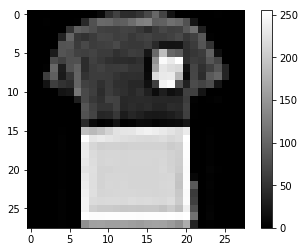

In [351]:
model_prediction(model_weights=prueba,
                 image_to_predict=test_images_model[27],
                 image_label = test_labels_model.iloc[27],
                 image_vector =test_imagesv[27])

## Generating 5 random image predictions 

We will use the random uniform distribution and ceiling function to generate random image prediction

Label predicted by model: T-shirt/Top
Probability of Label Predicted: 0.9387537377309743
Actual label :T-shirt/Top


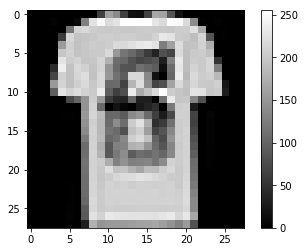

In [296]:
random_image = int(np.ceil(np.random.uniform(0,3000,1)))
model_prediction(model_weights=prueba,
                 image_to_predict=test_images_model[random_image],
                 image_label = test_labels_model.iloc[random_image],
                 image_vector =test_imagesv[random_image])

Label predicted by model: Trouser
Probability of Label Predicted: 0.426492467731898
Actual label :T-shirt/Top


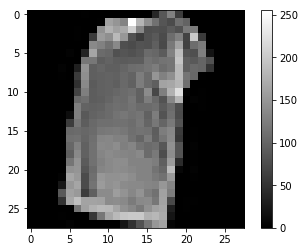

In [355]:
random_image = int(np.ceil(np.random.uniform(0,3000,1)))
model_prediction(model_weights=prueba,
                 image_to_predict=test_images_model[random_image],
                 image_label = test_labels_model.iloc[random_image],
                 image_vector =test_imagesv[random_image])

Label predicted by model: T-shirt/Top
Probability of Label Predicted: 0.5496817009042868
Actual label :T-shirt/Top


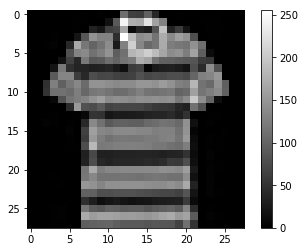

In [353]:
random_image = int(np.ceil(np.random.uniform(0,3000,1)))
model_prediction(model_weights=prueba,
                 image_to_predict=test_images_model[random_image],
                 image_label = test_labels_model.iloc[random_image],
                 image_vector =test_imagesv[random_image])

Label predicted by model: T-shirt/Top
Probability of Label Predicted: 0.6805308845455902
Actual label :Shirt


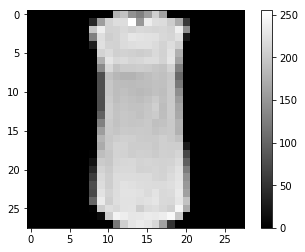

In [352]:
random_image = int(np.ceil(np.random.uniform(0,3000,1)))
model_prediction(model_weights=prueba,
                 image_to_predict=test_images_model[random_image],
                 image_label = test_labels_model.iloc[random_image],
                 image_vector =test_imagesv[random_image])

Label predicted by model: T-shirt/Top
Probability of Label Predicted: 0.6853120871635366
Actual label :Shirt


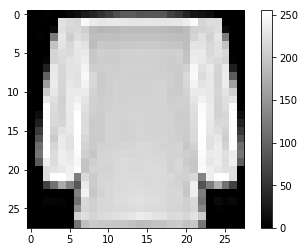

In [323]:
random_image = int(np.ceil(np.random.uniform(0,3000,1)))
model_prediction(model_weights=prueba,
                 image_to_predict=test_images_model[random_image],
                 image_label = test_labels_model.iloc[random_image],
                 image_vector =test_imagesv[random_image])

# Conclusions 

<img src="./graphs/cost_graphs.png" />

<img src="./graphs/acc_graphs.png" />

A multinomial classificator for fashion items was developed on tensorflow.
The model did not converged using the raw image data. Normalization using the max value of the dataset (255) was required. After normalization, the model converged rapidly.

For educational purposes the only hyperparameter that did not remained constant was the learning rate. 

At a learning rate of 10, the model did not converged and no weight matrix was generated.
At a learning rate of 1, the model developed and accuracy of .87 and converged rather quickly. At learning rate of 0.01, accuracy increased to 0.906, although conversion took a little longer. 
Smaller values of learning rate did not create a higher accuracy rating. For this reasons, a model using mini batches of size 32, a learning rate of 0.1 and 1000 epochs was chosen as the best one.

Several images at random where chosen from the test set in order to validate the accuracy of the model on new data. 
For some images, the model predicted the correct label with a high probability. For other images, the model predicted the correct label with a low probability (prob<0.34) and for some other images the model predicted a wrong label with a decent probability.

A possible explanation for wrong predictions could be that categories **shirt** and **t-shirt** could be really similar and could be grouped in only one category. Using more disimilar outfits (on real life) could lead to a better classification model.
